In [1]:
import sys
sys.path.insert(0, '../')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch

from dataset import get_sets, imshow
from capsule.net import CapsNet

## Load model

In [4]:
capsnet = CapsNet()
capsnet.load_state_dict(
    torch.load(open('../models/capsnet_state.pth', 'rb'), map_location=torch.device('cpu'))
)

<All keys matched successfully>

In [5]:
train_set, test_set = get_sets()

In [6]:
image, target = test_set[15]

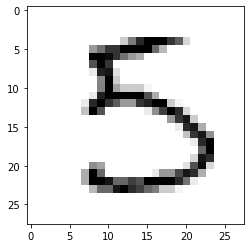

Target: 5


In [7]:
imshow(image)
print('Target:', target)

In [8]:
output, norm, reconstruction = capsnet(image.unsqueeze(0))

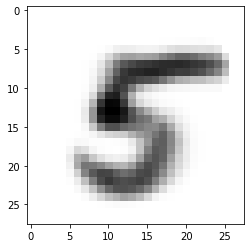

In [9]:
imshow(reconstruction[0].detach().view(28, 28).numpy())

## 16 Vec

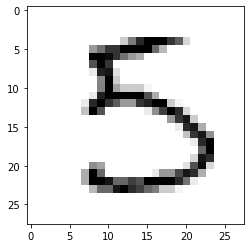

In [10]:
imshow(image)

In [11]:
output, norm, reconstruction = capsnet(image.unsqueeze(0))
output = output[0].detach()

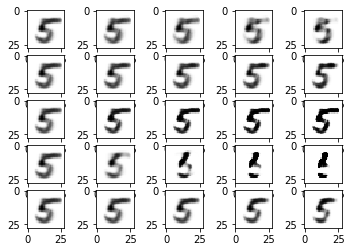

In [12]:
f, axarr = plt.subplots(5,5)
for feature in range(10, 15):
    for i in range(5):
        a = output.clone()
        a[5][feature] += i*2
        axarr[feature-10, i].imshow(capsnet.decoder(a.unsqueeze(0)).detach().view(28, 28).numpy(), cmap='binary')